In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_path = 'D:\HDD Giovanni\Desktop\dataset_new_FEATURES\dataset_train.xlsx'
val_path = 'D:\HDD Giovanni\Desktop\dataset_new_FEATURES\dataset_val.xlsx'
test_path = 'D:\HDD Giovanni\Desktop\dataset_new_FEATURES\dataset_test.xlsx'

In [5]:
train_df = pd.read_excel(train_path)
val_df = pd.read_excel(val_path)
test_df = pd.read_excel(test_path)

In [7]:
train_df.columns

Index(['path', 'dimensions', 'mean_intensity', 'std_intensity', 'contrast_0',
       'contrast_45', 'contrast_90', 'contrast_135', 'dissimilarity_0',
       'dissimilarity_45', 'dissimilarity_90', 'dissimilarity_135',
       'homogeneity_0', 'homogeneity_45', 'homogeneity_90', 'homogeneity_135',
       'energy_0', 'energy_45', 'energy_90', 'energy_135', 'correlation_0',
       'correlation_45', 'correlation_90', 'correlation_135', 'mean_area',
       'max_solidity', 'mean_equivalent_diameter', 'mean_perimeter',
       'mean_irregularity_index', 'mean_convex_area', 'label'],
      dtype='object')

In [9]:
X_train = train_df.drop(['path','dimensions', 'label'], axis=1)
y_train = train_df['label']

X_val = val_df.drop(['path','dimensions', 'label'], axis=1)
y_val = val_df['label']

X_test = test_df.drop(['path','dimensions', 'label'], axis=1)
y_test = test_df['label']

In [10]:
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (18537, 28), (18537,)
Validation set shape: (2058, 28), (2058,)
Test set shape: (2468, 28), (2468,)


In [12]:
X_train.isna().sum()

mean_intensity                 0
std_intensity                  0
contrast_0                     0
contrast_45                    0
contrast_90                    0
contrast_135                   0
dissimilarity_0                0
dissimilarity_45               0
dissimilarity_90               0
dissimilarity_135              0
homogeneity_0                  0
homogeneity_45                 0
homogeneity_90                 0
homogeneity_135                0
energy_0                       0
energy_45                      0
energy_90                      0
energy_135                     0
correlation_0                  0
correlation_45                 0
correlation_90                 0
correlation_135                0
mean_area                      0
max_solidity                   0
mean_equivalent_diameter       0
mean_perimeter                 0
mean_irregularity_index     4248
mean_convex_area               0
dtype: int64

In [27]:
# Sostituisci np.inf e -np.inf con np.nan
X_train['mean_irregularity_index'].replace([np.inf, -np.inf], np.nan, inplace=True)
X_val['mean_irregularity_index'].replace([np.inf, -np.inf], np.nan, inplace=True)
X_test['mean_irregularity_index'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Calcola il 50° percentile dalla colonna del training set
percentile_50 = X_train['mean_irregularity_index'].describe()['50%']

# Sostituisci i NaN nella colonna con il valore del 50° percentile
X_train['mean_irregularity_index'].fillna(percentile_50, inplace=True)
X_val['mean_irregularity_index'].fillna(percentile_50, inplace=True)
X_test['mean_irregularity_index'].fillna(percentile_50, inplace=True)

# Conferma che i NaN sono stati sostituiti
print(X_train['mean_irregularity_index'].isna().sum())
print(X_val['mean_irregularity_index'].isna().sum())
print(X_test['mean_irregularity_index'].isna().sum())


0
0
0


In [28]:
#check NaN
X_train.isna().sum()
X_val.isna().sum()
X_test.isna().sum()

mean_intensity              0
std_intensity               0
contrast_0                  0
contrast_45                 0
contrast_90                 0
contrast_135                0
dissimilarity_0             0
dissimilarity_45            0
dissimilarity_90            0
dissimilarity_135           0
homogeneity_0               0
homogeneity_45              0
homogeneity_90              0
homogeneity_135             0
energy_0                    0
energy_45                   0
energy_90                   0
energy_135                  0
correlation_0               0
correlation_45              0
correlation_90              0
correlation_135             0
mean_area                   0
max_solidity                0
mean_equivalent_diameter    0
mean_perimeter              0
mean_irregularity_index     0
mean_convex_area            0
dtype: int64

Duplicati nel DataFrame: 0


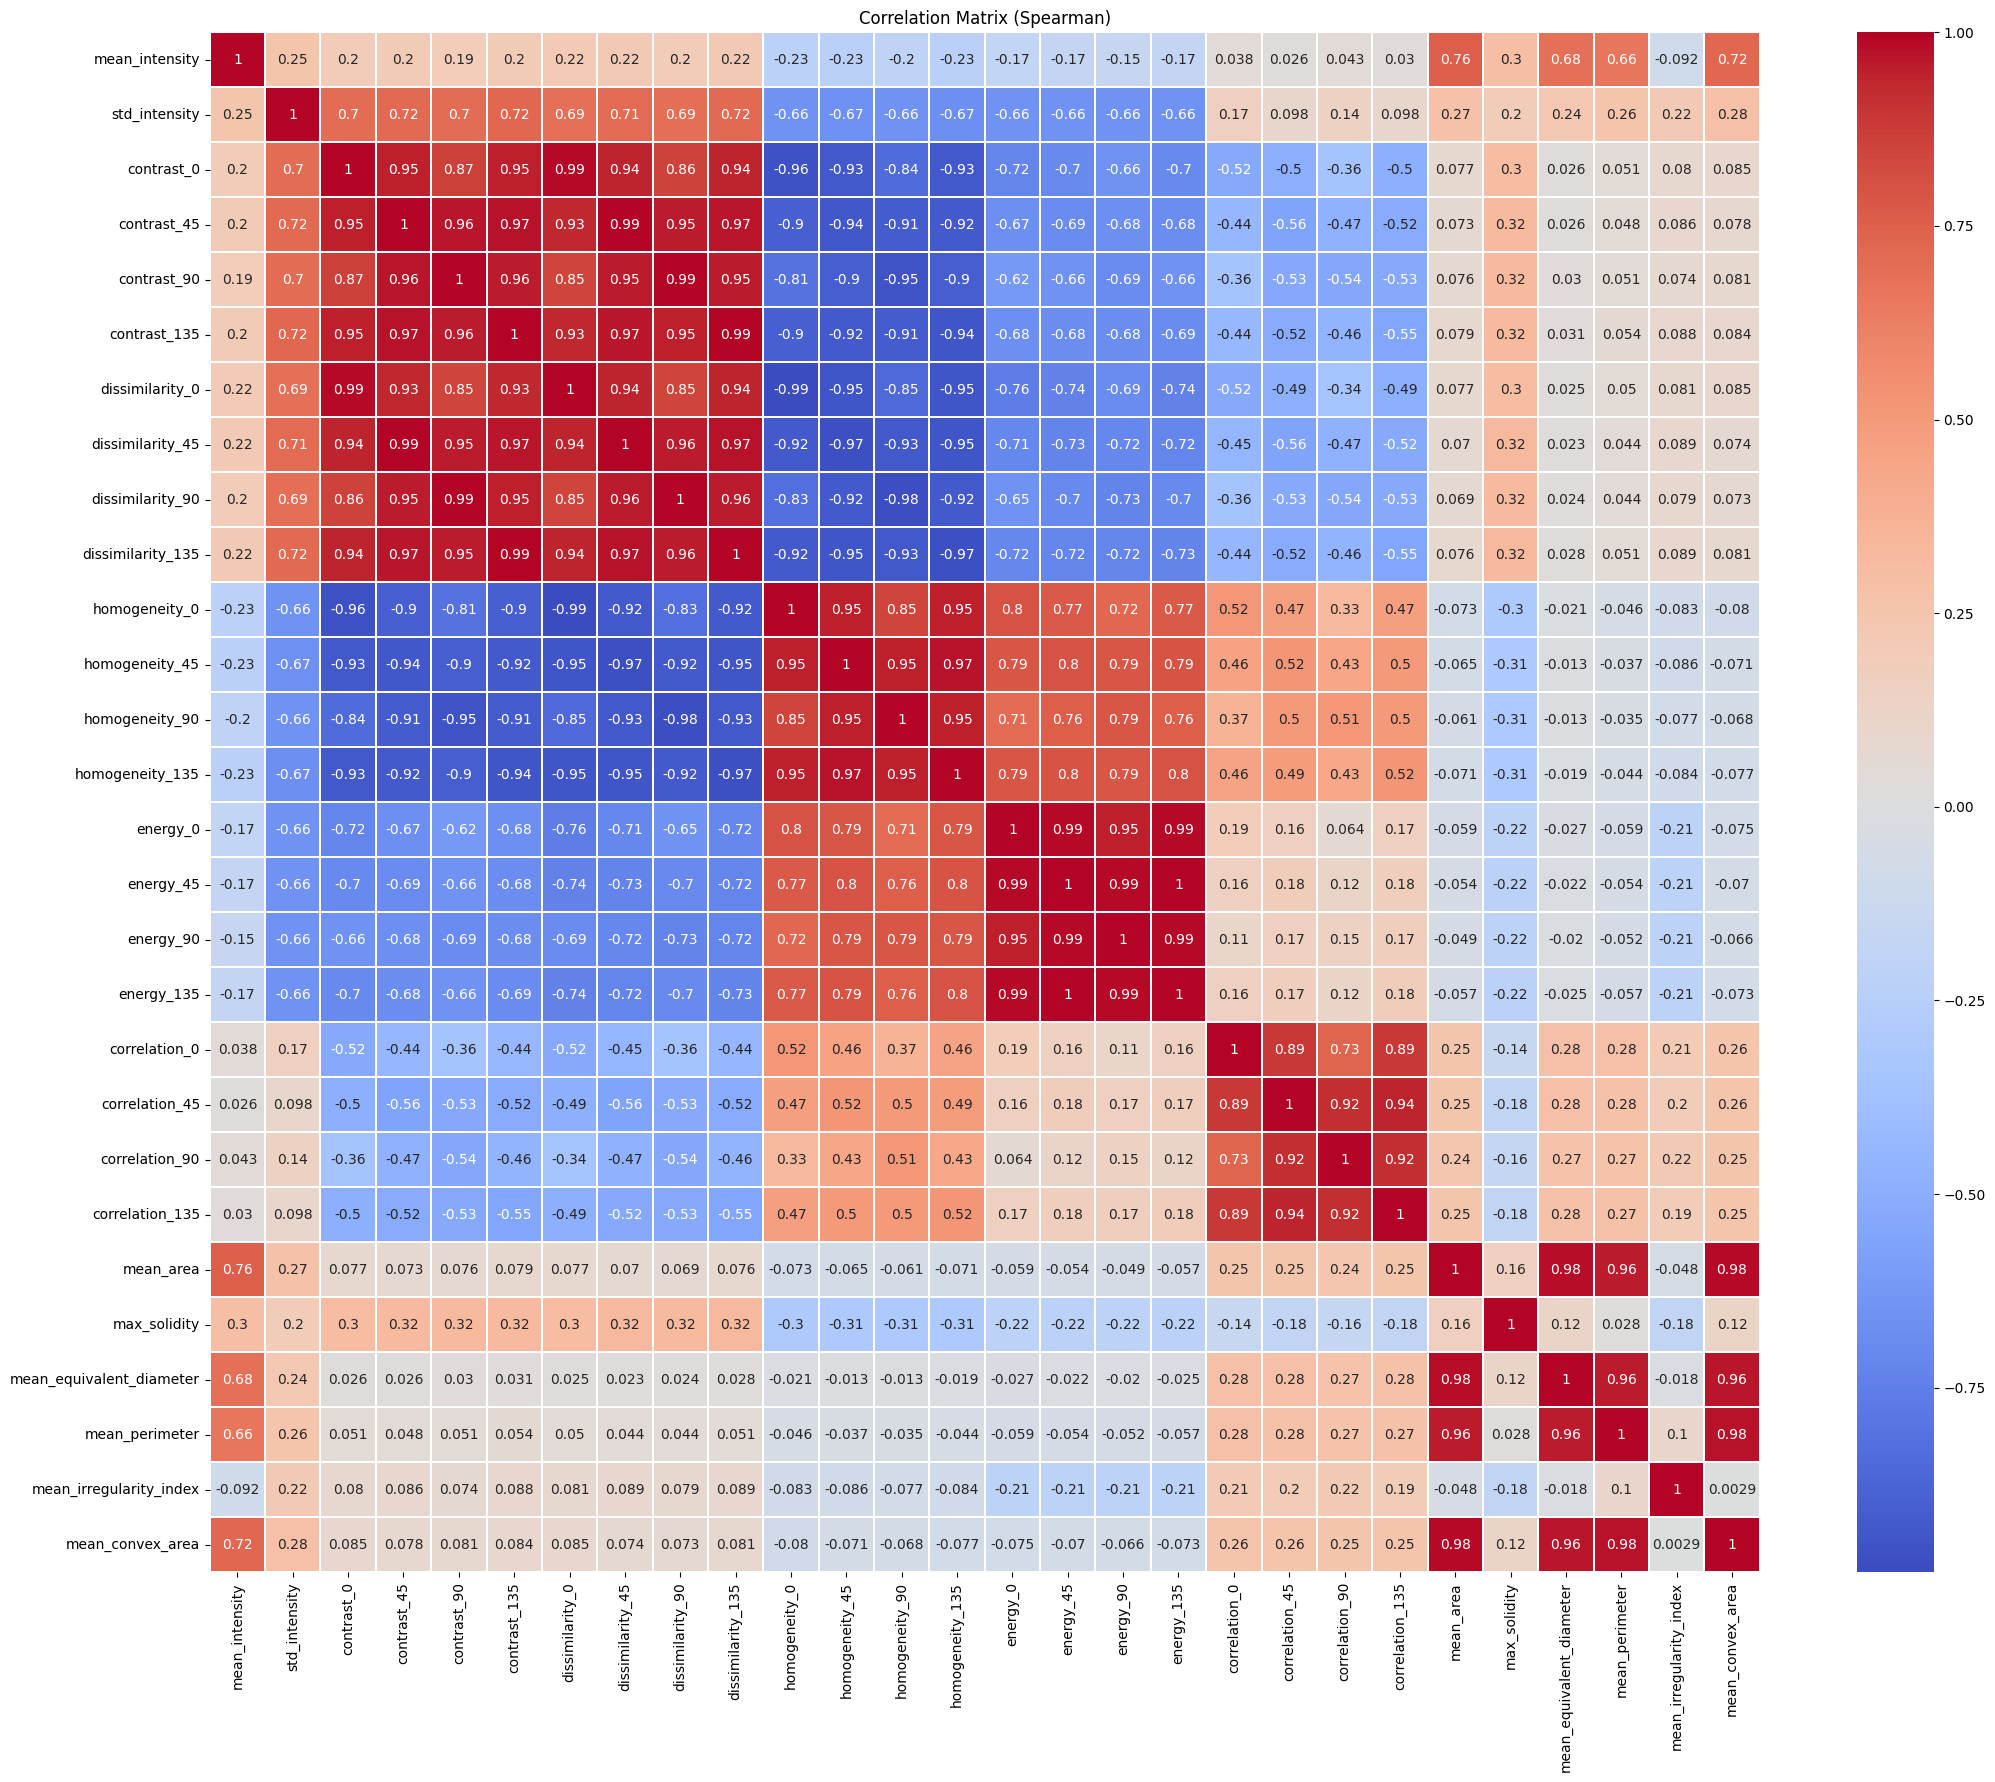

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sul df pandas  metodo che calcola la matrice di correlazione, metodo Spearman
matrice_di_correlazione = X_train.corr(method='spearman')


#plot della matrice di correlazione
plt.figure(figsize=(25, 20))
sns.heatmap(matrice_di_correlazione, annot=True, cmap='coolwarm', linewidths=0.3)
plt.title('Correlation Matrix (Spearman)')
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler

# Crea lo scaler
scaler = StandardScaler()

# Adatta lo scaler solo sulle features di training e trasforma le features di training
X_train_scaled = scaler.fit_transform(X_train)

# Utilizza lo scaler adattato per trasformare le features di validation e di test
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import joblib


# Definisci il modello base Random Forest
rf = RandomForestClassifier(random_state=42)

# Crea un dizionario con i parametri che vuoi testare
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Configura GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Esegui la ricerca degli iperparametri
grid_search.fit(X_train_scaled, y_train)

# Ottieni il miglior modello trovato dalla ricerca
best_rf = grid_search.best_estimator_
best_params_rf = grid_search.best_params_

# Salva il modello su disco
joblib.dump(best_rf, 'best_random_forest_model.joblib')

# Valuta il miglior modello sul set di validation
val_predictions = best_rf.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')

print(best_params_rf)
print(best_rf)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Validation Accuracy: 66.08%
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
RandomForestClassifier(min_samples_split=5, n_estimators=300, random_state=42)


In [38]:

# Valuta il miglior modello sul set di test
RF_predictions = best_rf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, RF_predictions)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

Test Accuracy: 64.42%


In [39]:
#print confusion matrix e precision recall f1 ecc
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la confusion matrix
cm = confusion_matrix(y_test, RF_predictions)
cm


array([[1147,  106,   23,   18],
       [ 293,  186,   52,   17],
       [ 132,   90,  165,   14],
       [ 111,   15,    7,   92]], dtype=int64)

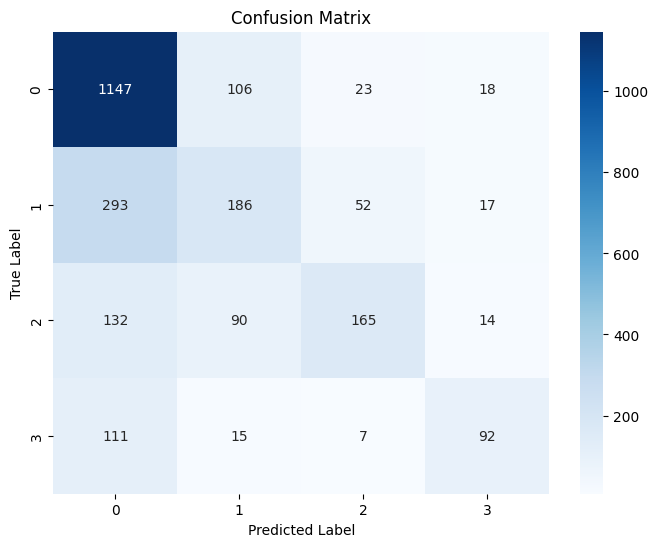

In [41]:
# Visualizza la confusion matrix con Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1','2','3'], yticklabels=['0', '1','2','3'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [45]:
#precision recall f1
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcola precision, recall e f1 score basandosi sui valori fittizi
precision = precision_score(y_test, RF_predictions, average='weighted')
recall = recall_score(y_test, RF_predictions, average='weighted')
f1 = f1_score(y_test, RF_predictions, average='weighted')

print(f'Precision: {precision*100:.2f}%')
print(f'recall: {recall*100:.2f}%')
print(f'f1: {f1*100:.2f}%')


Precision: 62.94%
recall: 64.42%
f1: 62.00%


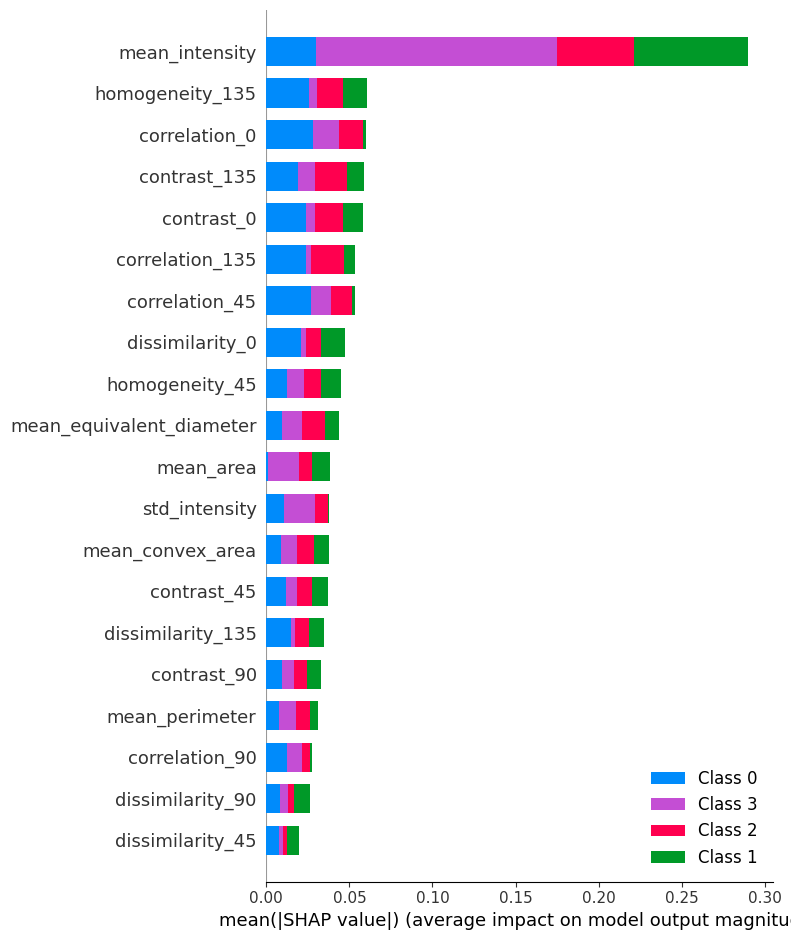

In [53]:
import shap
# explainer SHAP
explainer = shap.TreeExplainer(best_rf)

# Calcola i valori SHAP per il set di test
shap_values = explainer.shap_values(X_test_scaled)


# Plot summary plot with all features
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", max_display=28, feature_names=X_test.columns)
plt.savefig('D:\HDD Giovanni\Desktop\shap_plot_RF.jpeg', dpi=300)
plt.savefig('D:\HDD Giovanni\Desktop\shap_plot.jpg')

In [54]:
X_test.columns

Index(['mean_intensity', 'std_intensity', 'contrast_0', 'contrast_45',
       'contrast_90', 'contrast_135', 'dissimilarity_0', 'dissimilarity_45',
       'dissimilarity_90', 'dissimilarity_135', 'homogeneity_0',
       'homogeneity_45', 'homogeneity_90', 'homogeneity_135', 'energy_0',
       'energy_45', 'energy_90', 'energy_135', 'correlation_0',
       'correlation_45', 'correlation_90', 'correlation_135', 'mean_area',
       'max_solidity', 'mean_equivalent_diameter', 'mean_perimeter',
       'mean_irregularity_index', 'mean_convex_area'],
      dtype='object')

In [55]:
shap_values

[array([[-3.05249250e-02,  1.21101423e-02, -2.55335052e-02, ...,
         -6.60784533e-03, -1.43220226e-03,  9.99028236e-03],
        [-3.45256501e-02,  1.20147790e-02, -2.36550655e-02, ...,
         -7.40593757e-03,  5.73829068e-05,  9.69344150e-03],
        [-3.55908094e-02,  1.09395165e-02, -2.30898974e-02, ...,
         -7.40409602e-03, -2.11374653e-04,  8.38007631e-03],
        ...,
        [-3.83468380e-02,  1.19209662e-02, -1.68152540e-02, ...,
          5.13064262e-03, -8.53664292e-03,  2.07663045e-03],
        [-4.19957768e-02,  1.22604478e-02, -2.15303823e-02, ...,
          6.09073748e-03, -7.89687211e-03,  1.47086404e-03],
        [-2.91638798e-02,  1.16677531e-02, -2.52025723e-02, ...,
         -7.03481284e-03,  4.01721802e-04,  1.01127076e-02]]),
 array([[-6.85580698e-02,  4.58459192e-05,  1.38021752e-02, ...,
          4.43780608e-03,  4.00235628e-03, -9.57154503e-03],
        [-6.96939625e-02, -7.75914139e-04,  1.21894702e-02, ...,
          3.51791822e-03,  3.34471048e

In [1]:
#load the model and to do the inference
#load  the model
import joblib
# load the saved model
reg = joblib.load('D:\HDD Giovanni\PycharmProjects\provaTFdef\wandb\\best_random_forest_model.joblib')
reg

NameError: name 'shap_values' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# Valuta il miglior modello sul set di test
RF_predictions = reg.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, RF_predictions)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

In [ ]:
#print confusion matrix e precision recall f1 ecc
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la confusion matrix
cm = confusion_matrix(y_test, RF_predictions)
cm

In [ ]:
# Visualizza la confusion matrix con Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1','2','3'], yticklabels=['0', '1','2','3'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#precision recall f1
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcola precision, recall e f1 score basandosi sui valori fittizi
precision = precision_score(y_test, RF_predictions, average='weighted')
recall = recall_score(y_test, RF_predictions, average='weighted')
f1 = f1_score(y_test, RF_predictions, average='weighted')

print(f'Precision: {precision*100:.2f}%')
print(f'recall: {recall*100:.2f}%')
print(f'f1: {f1*100:.2f}%')
